In [15]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
import warnings

In [16]:
warnings.simplefilter("ignore")

In [39]:
df=pd.read_csv("final.csv",index_col=0)

In [40]:
df.Genre.value_counts()

rock       2777
country    2298
pop        2039
hiphop     1592
Name: Genre, dtype: int64

In [41]:
df.columns

Index(['Genre', 'Title', 'Artist', 'Explicit', 'Length', 'Scale', 'Key', 'BPM',
       'Danceability', 'Positiveness', 'Liveness', 'Energy', 'speechness',
       'KeyScaled', 'Lyrics', 'Not_Formatted_Lyrics', 'Lem_Lyrics',
       'Lyrics_Length', 'Longest_Line', 'Length_Words_Ratio'],
      dtype='object')

In [42]:
df.drop(['Lyrics','Title','Artist','KeyScaled','Not_Formatted_Lyrics'],axis=1,inplace=True)

In [43]:
df.head()

,Genre,Explicit,Length,Scale,Key,BPM,Danceability,Positiveness,Liveness,Energy,speechness,Lem_Lyrics,Lyrics_Length,Longest_Line,Length_Words_Ratio
0,rock,False,5.02,D,Major,106,25,11,13,97,7,awaken rebellion wake change course law follow...,173,47,34.462151
1,rock,False,4.08,F#,Minor,86,32,18,10,28,3,hello darkness old friend I talk vision softly...,218,97,53.431373
2,rock,False,5.00,A,Major,182,38,51,24,95,4,incite riot put trance rotate frame world rely...,154,48,30.800000
3,rock,False,4.15,A,Major,188,31,76,8,70,5,back black I hit sack I long I glad back yes I...,307,55,73.975904
4,rock,False,4.24,G,Minor,170,35,24,12,88,4,mock slaughter pure kind blind noise maze flas...,95,53,22.405660


In [44]:
df["Major"] = df["Key"]
df["Major"] = df["Major"].apply(lambda x: 0 if x == "Minor" else 1)
df.drop(columns=['Key'],inplace=True)

In [45]:
df["Explicit"] = df["Explicit"].apply(lambda x: 0 if x == False else 1)

In [46]:
res = pd.get_dummies(df["Scale"])
df.drop(columns=['Scale'],inplace=True)
df = pd.concat([df, res], axis=1)
df.dropna(subset=['Lem_Lyrics'],inplace=True)

In [47]:
#ignore the stopword, ignore words that haven't appeared with 10% of the song
vectorizer=CountVectorizer(stop_words="english",min_df=0.01,ngram_range=(1,2))
lyrics_features=vectorizer.fit_transform(df.pop("Lem_Lyrics"))

In [48]:
lyrics_features.shape

(8704, 1005)

In [49]:
df.shape

(8704, 25)

In [50]:
#convertis the sparse matrix to pandas dataframe
b=pd.DataFrame(lyrics_features.toarray(), columns=vectorizer.get_feature_names(), index= df.index)
df=df.join(b)
df.shape

(8704, 1030)

In [51]:
df.head()

,Genre,Explicit,Length,BPM,Danceability,Positiveness,Liveness,Energy,speechness,Lyrics_Length,...,write,wrong,yard,year,yellow,yes,yesterday,yo,york,young
0,rock,0,5.02,106,25,11,13,97,7,173,...,0,0,0,0,0,0,0,0,0,0
1,rock,0,4.08,86,32,18,10,28,3,218,...,2,0,0,0,0,0,0,0,0,0
2,rock,0,5.00,182,38,51,24,95,4,154,...,0,0,0,0,0,0,0,0,0,0
3,rock,0,4.15,188,31,76,8,70,5,307,...,0,0,0,0,0,12,0,0,0,0
4,rock,0,4.24,170,35,24,12,88,4,95,...,0,0,0,0,0,0,0,0,0,0


In [52]:
y=df["Genre"]
X=df.drop(columns=["Genre"],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)




The model Random Forest have score of 0.6852383687535899.
 Confusion Matrix:



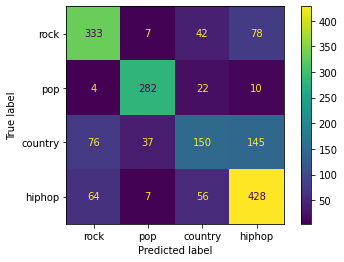






The model Naive Bayes have score of 0.6243538196438828.
 Confusion Matrix:



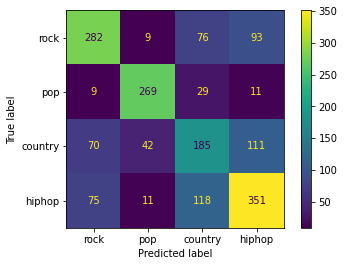






The model SVM have score of 0.6157380815623205.
 Confusion Matrix:



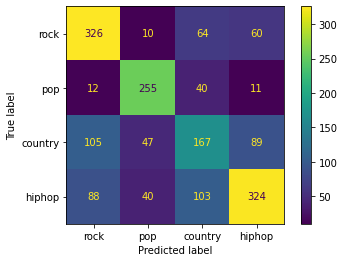






The model Logistic Regression have score of 0.6111430212521539.
 Confusion Matrix:



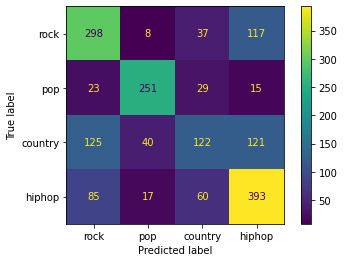

In [53]:
rd=RandomForestClassifier()
lg=LogisticRegression()
naive=MultinomialNB()
svm=SVC(kernel='linear')
best_recall_val=0
result=[]
for clf,model in zip([rd,naive,svm,lg],["Random Forest","Naive Bayes","SVM","Logistic Regression"]):
    clf.fit(X_train,y_train)
    y_predicted=clf.predict(X_test)
    clf_score_test=accuracy_score(y_true=y_test,y_pred=y_predicted)
    result.append({"Model":model,"y_test_score":clf_score_test})
    print(f"\n\nThe model {model} have score of {clf_score_test}.\n Confusion Matrix:\n")
    cm=confusion_matrix(y_true=y_test,y_pred=y_predicted)
    disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["rock","pop","country","hiphop"])
    disp.plot(include_values=True)
    plt.show()
    print("\n\n")

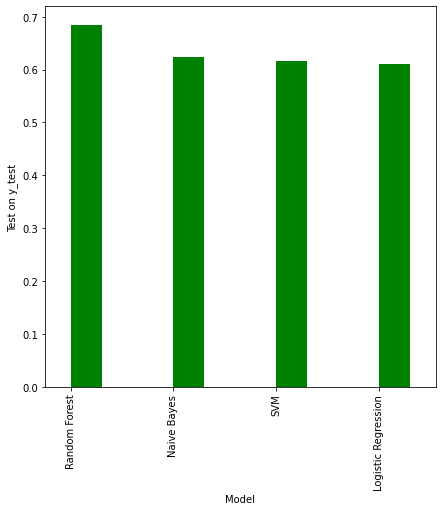

In [54]:
result_df=pd.DataFrame(result)

result_df = result_df.set_index('Model')

fig = plt.figure(figsize=(7,7)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
width = .3

result_df.y_test_score.plot(kind='bar',color='green',ax=ax,width=width, position=0)


ax.set_ylabel('Test on y_test')
print("\n")
plt.show()

In [55]:
#Random Forest Granted the best accuarcy. Let's find the best features via GridSearch
parameters = {'n_estimators':range(50,550,50)}
rd=RandomForestClassifier()
gs = GridSearchCV(rd,parameters)
gs.fit(X_train,y_train)
gs.best_params_

{'n_estimators': 300}

In [56]:
gs.best_score_

0.6747082085303363

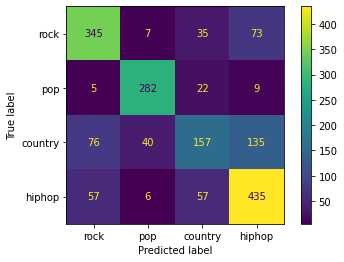


 0.7001723147616312


In [57]:
rd=RandomForestClassifier(**gs.best_params_)
rd.fit(X_train,y_train)
y_predicted=rd.predict(X_test)
score=accuracy_score(y_true=y_test,y_pred=y_predicted)
cm=confusion_matrix(y_true=y_test,y_pred=y_predicted)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["rock","pop","country","hiphop"])
disp.plot(include_values=True)
plt.show()
print('\n',score)